In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

import pandas as pd

%matplotlib inline

In [2]:
#load data with pandas
data = pd.read_csv(os.path.join('Datasets/Data_ex1', 'ex1data1.txt'), sep=",", header=None)
X,y=data[0],data[1]

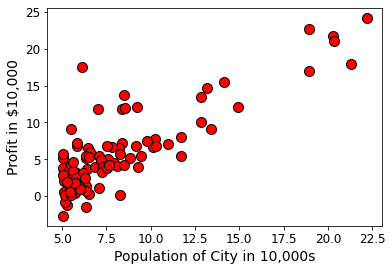

In [3]:
def plotData(x,y):
    plt.figure()
    plt.plot(x,y,'ro',ms=10,mec='k')
    plt.ylabel('Profit in $10,000',fontsize=14)
    plt.xlabel('Population of City in 10,000s',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
#     plt.show()
    
plotData(X,y)

# Gradient descent implementation

We need to implement the following:

$Cost function=J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$

where

$h_{\theta}(x)=\theta^Tx=\theta_0+\theta_1x_1$

then we need to simultaneously update $\theta_j$ as:

$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$

In [4]:
m = y.size  # number of training examples
# Introce a column of ones to acommodate $\theta_0$
X = np.stack([np.ones(m), X], axis=1)

In [5]:
# Implement J(\theta)=1/2m sum_i^m (h(x)-y)^2
# where h(x)=theta^T X
def computeCost(X, y, theta):
    m=0
    J=0
    
    m = y.size  # number of training examples
    J= 1/(2*m)*np.sum(np.square(np.dot(X,theta)-y))
    
    return J

# Implement GD
def gradientDescent(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    theta=theta.copy()
    J_history=[]
    
    for i in range(num_iters):
        theta_temp=np.zeros_like(theta)
        
        for j in range(np.shape(theta)[0]):
            theta_temp[j]=theta[j] - alpha*(1/m)*np.sum((np.dot(X,theta)-y)*X[:,j])
            
        theta=theta_temp
        
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

In [6]:
theta=np.array([0.0,0.0])
J=computeCost(X,y,theta)
print(J)

theta=np.array([-1,2])
J=computeCost(X,y,theta)
print(J)

32.072733877455676
54.24245508201238


In [7]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


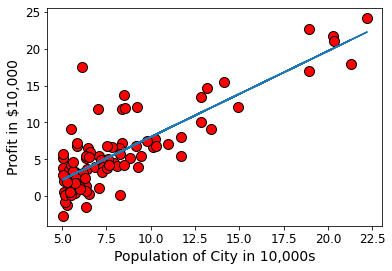

In [8]:
plotData(X[:, 1], y)
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

Now as we already have our prediction model defined we can use it to predict the Y (profit). 

In [9]:
predict1=np.dot([1,3.5],theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2=np.dot([1,12.5],theta)
print('For population = 12,500, we predict a profit of {:.2f}\n'.format(predict2*10000))


For population = 35,000, we predict a profit of 4519.77

For population = 12,500, we predict a profit of 109492.38



# Visualizing the cost function $J(\theta)$

In [10]:
# We will create a map of J for differente values of theta
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)

# Initialize J_vals (matrix) with 0's
J_vals=np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))

In [11]:
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

In [12]:
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

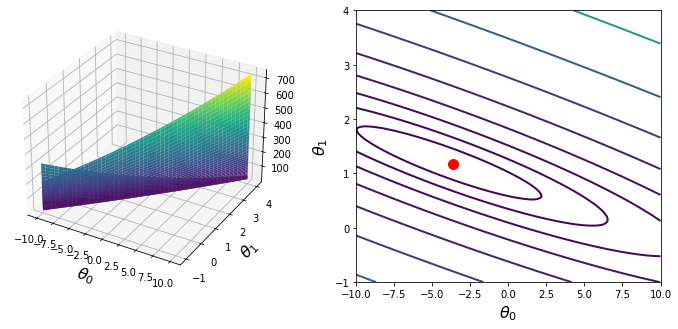

In [13]:
fig = plt.figure(figsize=(12,5))
# SURFACE PLOT
ax = fig.add_subplot(121,projection='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap='viridis')
plt.xlabel(r'$\theta_0$',fontsize=16)
plt.ylabel(r'$\theta_1$',fontsize=16)

# CONTOUR PLOT
ax = plt.subplot(122)
plt.contour(theta0_vals,theta1_vals,J_vals,linewidths=2,cmap='viridis',levels=np.logspace(-2,3,20))
plt.plot(theta[0],theta[1],'ro',ms=10, lw=2)
plt.xlabel(r'$\theta_0$',fontsize=16)
plt.ylabel(r'$\theta_1$',fontsize=16)
plt.show()

# Linear Regression with multiple variables

In [14]:
#load data with pandas
data = pd.read_csv(os.path.join('Datasets/Data_ex1', 'ex1data2.txt'), sep=",", header=None)
data=data.astype(float)
X = np.stack([data[0].values, data[1].values], axis=1)
y = data[2].values
m = y.size

# data = np.loadtxt(os.path.join('Datasets/Data_ex1', 'ex1data2.txt'), delimiter=',')
# X = data[:, :2]
# y = data[:, 2]
# m = y.size

print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


### let's scale our variables: feature scale

substract the mean and divide by the respective std

In [15]:
def feature_scaling(X):
    X_norm = X.copy()
#     mu = np.zeros(X.shape[1])
#     sigma = np.zeros(X.shape[1])

    cols = np.shape(X)[-1]
    mu = np.zeros(cols)
    sigma = np.zeros(cols)
    
    for i in range(cols):
        mu[i] = np.mean(X[:, i])
        sigma[i] = np.std(X[:, i])
    
        X_norm[:, i] = (X[:, i] - mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [16]:
X_norm, mu, sigma = feature_scaling(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X_norm[i, 0], X_norm[i, 1], y[i]))

# add X_0=1
X = np.concatenate([np.ones((m,1)),X_norm],axis=1)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]
       0      -0    399900
      -1      -0    329900
       1      -0    369000
      -1      -2    232000
       1       1    539900
      -0       1    299900
      -1      -0    314900
      -1      -0    198999
      -1      -0    212000
      -1      -0    242500


# GD multivariate

$J(\theta)=\frac{1}{2m}(X\theta-y)^T(X\theta-y)$

$\theta=\theta - \alpha\frac{1}{m}(X^T(X\theta-y))$

In [17]:
def computeCostMulti(X,y,theta):
    m=y.shape[0]
    J=0
    J = 1/(2*m)*(np.dot((np.dot(X, theta) - y).T, np.dot(X, theta) - y))
    
    return J

def gradientDescentMulti(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    theta=theta.copy()
    J_history=[]
    
    for i in range(num_iters):
        theta = theta - alpha*(1/m)*(np.dot(X.T,np.dot(X,theta)-y))
        J_history.append(computeCostMulti(X,y,theta))
        
    return theta,J_history

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]


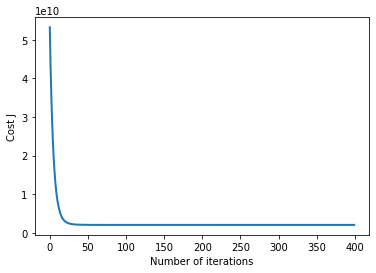

In [18]:
# initialize fitting parameters
theta = np.zeros(3)

# some gradient descent settings
iterations = 400
alpha = 0.1

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)
print('theta computed from gradient descent: {:s}'.format(str(theta)))


# Plot the convergence graph
plt.figure()
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()


Predict 

$h_{\theta}(x)=\theta^Tx$

In [19]:
# Introduce the prediction in x_norm
# x_norm=[x0,x1,x2] remember x0==1
x_norm = [1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]]
price = np.dot(np.transpose(theta),x_norm)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


# Normal Equation

#### Analytical solution. Works well for small n (approx 1000)

$\theta=(X^TX)^{-1}X^Ty$

In [20]:
data = pd.read_csv(os.path.join('Datasets/Data_ex1', 'ex1data2.txt'), sep=",", header=None)
data=data.astype(float)
X = np.stack([data[0].values, data[1].values], axis=1)
y = data[2].values
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [21]:
def normalEq(X,y):
    theta=np.zeros(X.shape[1])
    
    matrix_inv=np.linalg.pinv(np.dot(X.T,X))
    theta = np.dot(np.dot(matrix_inv,X.T),y)
    
    return theta

In [22]:
theta = normalEq(X, y);

print('Theta computed from the normal equations: {:s}'.format(str(theta)));

price = np.dot(np.transpose(theta), [1, 1650, 3])
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.90954355   139.21067402 -8738.01911255]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081


In [23]:
import sys
sys.path.append("/home/ldallap/Desktop/GitRep/learning/")
from LDallaP_Functions_Python import *

In [24]:
help(ML_LinearReg_CostFunc_Multi)

Help on function ML_LinearReg_CostFunc_Multi in module LDallaP_Functions_Python:

ML_LinearReg_CostFunc_Multi(X, y, theta)
    Compute the cost fuction for linear regression with multiple variables
    
    Equantion implemented
    ---------
    J(theta) = frac{1}{2m} (X theta - y)^T (X theta -y)
    
    Parameters
    ---------
    X: array like. Shape (m x n+1)
    y: array like. Shape (m)
    theta: array like. Shape (n+1, )
    
    Returns
    ---------
    J: float. Cost function value

